In [88]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import warnings
warnings.filterwarnings("ignore")

In [89]:
df = pd.read_csv('pima.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [90]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [92]:
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']
print(X.columns)
print(y)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 48)

In [94]:
lm = LogisticRegression()

In [95]:
lm.fit(X_train, y_train)

LogisticRegression()

In [96]:
y_test_pred = lm.predict(X_test)

In [97]:
cm = metrics.confusion_matrix(y_test, y_test_pred)
cm

array([[93, 12],
       [21, 28]])

<Axes: >

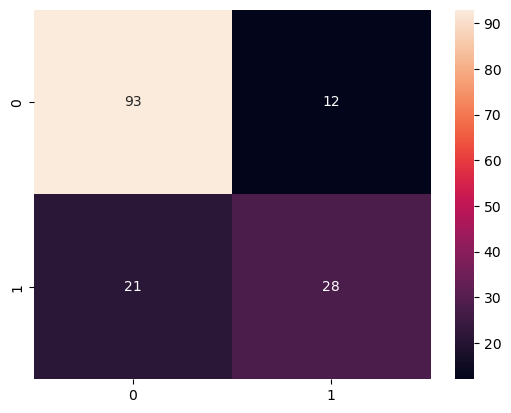

In [98]:
sns.heatmap(cm, annot=True, fmt='.0f')

In [99]:
print(lm.score(X_test, y_test))

0.7857142857142857


In [100]:
score =accuracy_score(y_test,y_test_pred)
precision=precision_score(y_test, y_test_pred)
error_rate = 1 - score
recall=recall_score(y_test, y_pred)
F1_score = f1_score(y_test, y_pred)
print("Accuracy:",score)
print("Error rate:",error_rate)
print('Precision:',precision)
print("Recall:",recall)
print("F1 Score:",F1_score)

Accuracy: 0.7857142857142857
Error rate: 0.2142857142857143
Precision: 0.7
Recall: 0.5714285714285714
F1 Score: 0.6292134831460674
